In [1]:
import ROOT
from ROOT import *

import os

Welcome to JupyROOT 6.26/04


In [2]:
filelist=os.listdir('./')

myFiles=[files for files in filelist if '_v1_' in files]
sorted_myFiles = sorted(myFiles)
sorted_myFiles

['VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_DYJetsToLL_M10to50_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_DYJetsToLL_M50_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_HTbinnedWJets_Inclusive_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_120to170_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_170to300_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_20to30_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_300to470_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_30to50_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_470to600_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_50to80_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_600to800_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_800to1000_sample.root',
 'VLL2018_1L2JAnalysis_bJetEff_Dec16_v1_QCD_MuEnriched_80to120_sample.root',
 'VLL2

In [3]:
def printbEff(fname,cName):
    
    #Read
    file=TFile.Open(fname,'READ')
    
    #Read Histo
    den = 'bJet_PtEta'
    num = 'bJet_MedWP_PtEta'
    
    num_histo= file.Get(num)
    den_histo= file.Get(den)

    eff_histo=num_histo.Clone()
    eff_histo.Divide(den_histo)
    
    
    titlelabel=fname.split('_sample')[0].split('_v1_')[1]
    canvas=TCanvas(cName,"",800,600)
    gStyle.SetOptStat(0)
    eff_histo.GetZaxis().SetRangeUser(0.0,1.0)
    canvas.SetLogx(1)
    eff_histo.Draw('colz text same')
    eff_histo.SetTitle('bJetEff_'+titlelabel)
    canvas.Draw()
    canvas.SaveAs(f'bJetEff_{titlelabel}.png')
    
    
    
    ##printarray
    
    print('For the sample '+ titlelabel+'\n')
    bjeteffarray=[]
    for i in range(1,4):
        foreacheta=[]
        for j in range(2,10):
            #print(f'{i}{j}')
            value= eff_histo.GetBinContent(j,i)
            foreacheta.append(value)
        bjeteffarray.append(foreacheta)
    bjeteffarray

    return canvas,bjeteffarray

In [4]:
sortlabel=['VLL_','DYJetsToLL','QCD','TTBar','SingleTop','WW','WZ','ZZ','HTbinnedWJets']


For the sample VLL_M125

{{0.8223967552185059, 0.830436646938324, 0.8423120379447937, 0.8835386633872986, 0.8245242834091187, 0.8883928656578064, 0.9189189076423645, 1.0}, {0.7855663895606995, 0.8195559978485107, 0.8130348920822144, 0.8129870295524597, 0.8217054009437561, 0.8315789699554443, 0.804347813129425, 0.8571428656578064}, {0.7432932257652283, 0.7842679023742676, 0.785263180732727, 0.798828125, 0.8112244606018066, 0.7692307829856873, 0.8947368264198303, 1.0}}




For the sample VLL_M100

{{0.7819767594337463, 0.8629579544067383, 0.8209982514381409, 0.8175675868988037, 0.8726114630699158, 0.9090909361839294, 0.8333333134651184, 0.75}, {0.7718665599822998, 0.8372483253479004, 0.7986270189285278, 0.7594936490058899, 0.8015872836112976, 0.8666666746139526, 0.875, 1.0}, {0.7535301446914673, 0.7657004594802856, 0.7672131061553955, 0.7432432174682617, 0.746666669845581, 0.90625, 1.0, 0.0}}




For the sample VLL_M150

{{0.8198791742324829, 0.8337355852127075, 0.8528093695640564, 0.855

For the sample TTBar_TTToSemiLeptonic

{{0.8226889371871948, 0.8463799953460693, 0.8585599064826965, 0.8654028177261353, 0.8687498569488525, 0.8665615916252136, 0.8497944474220276, 0.800851583480835}, {0.7871336340904236, 0.8127925395965576, 0.8267132639884949, 0.8347923755645752, 0.8390839695930481, 0.8325045108795166, 0.8056456446647644, 0.7432562112808228}, {0.7537021636962891, 0.7785574793815613, 0.7899388670921326, 0.7979592680931091, 0.8045591115951538, 0.799660861492157, 0.7704703211784363, 0.6900119185447693}}




For the sample SingleTop_tW_Top_InclusiveDecays

{{0.8198073506355286, 0.8453641533851624, 0.857130765914917, 0.8639904856681824, 0.8651940226554871, 0.8669873476028442, 0.8709520697593689, 0.8174691796302795}, {0.7844170928001404, 0.8127108216285706, 0.8250738978385925, 0.8337880969047546, 0.8369391560554504, 0.8307664394378662, 0.8148042559623718, 0.7600536346435547}, {0.7552551031112671, 0.7782270312309265, 0.7900748252868652, 0.8001344799995422, 0.7980250716209412

Info in <TCanvas::Print>: png file bJetEff_VLL_M125.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M100.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M150.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M250.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M350.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M300.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M200.png has been created
Info in <TCanvas::Print>: png file bJetEff_VLL_M400.png has been created
Info in <TCanvas::Print>: png file bJetEff_DYJetsToLL_M50.png has been created
Info in <TCanvas::Print>: png file bJetEff_DYJetsToLL_M10to50.png has been created
Info in <TCanvas::Print>: png file bJetEff_QCD_MuEnriched_300to470.png has been created
Info in <TCanvas::Print>: png file bJetEff_QCD_MuEnriched_170to300.png has been created
Info in <TCanvas::Print>: png file bJetEff_QCD_MuEnriched_120to170.png has bee

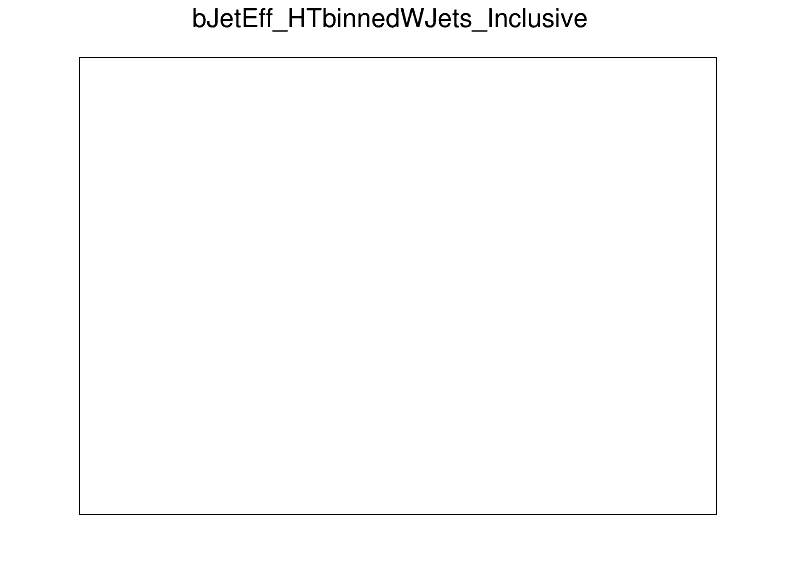

In [5]:
for bkg in sortlabel:
    for index, fname_ in enumerate(myFiles):
        if(bkg in fname_):
            canvas,effarray = printbEff(fname_,'can'+str(index))
            carray=str(effarray).replace('[','{').replace(']','}')
            print(carray)
            print('\n\n\n')